In [1]:
import gym
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# qTable = np.zeros((state_size, action_size))
# qTable

In [3]:
max_episodes = 1000
test_episodes = 100

max_steps = 10                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01     

In [17]:
class Q_Agent:
    def __init__(self, max_episodes, max_steps, test_episodes, alpha, gamma, epsilon):
        self.env = gym.make("Taxi-v3", render_mode = "rgb_array")
        self.qtable = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        self.max_episodes = max_episodes
        self.steps = max_steps
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.reward_arr = np.empty(max_episodes)
        
        
    def run(self):
        print("Training....")
        for episode in range(max_episodes):
            print("Episode: {}".format(episode))
            state = self.env.reset()
            done = False
            eps_reward = 0
            
            for step in range(self.steps):
                exp_exp_tradeoff = random.uniform(0,1)
                if exp_exp_tradeoff > self.epsilon:
                    if type(state) == tuple:
                        action = np.argmax(self.qtable[state[0],:])
                    else:
                        action = np.argmax(self.qTable[state,:])
                
                else:
                    action = self.env.action_space.sample()
                
                new_state, reward, done, info, _ = self.env.step(action)
                
                eps_reward += reward
                
                print("reward: {}".format(reward))
                
                if type(state) == tuple:
                    self.qtable[state[0], action] = self.qtable[state[0], action] + self.alpha * (reward + self.gamma * 
                                            np.max(self.qtable[new_state, :]) - self.qtable[state[0], action])

                else:
                    self.qtable[state, action] = self.qtable[state, action] + self.alpha * (reward + self.gamma * 
                                            np.max(self.qtable[new_state, :]) - self.qtable[state, action])
                    
                state = new_state
                
                if done == True: 
                    flag = 0
                    self.reward_arr[episode] = eps_reward
                    break
        
    
        # Reduce epsilon (because we need less and less exploration)
        self.epsilon = self.epsilon *np.exp(-decay_rate*episode) 
        print("Learning done!")
        
        
    def plot_rewards(self):
        plt.title("Rewards over episodes")
        plt.xlabel("episode")
        plt.ylabel("reward")
        plt.plot(self.reward_arr)
        plt.show()     

    

In [14]:
agent = Q_Agent(max_episodes = 5000, max_steps = 100, test_episodes = 100, alpha = 0.1, gamma = 0.95, epsilon = 1.0)

In [15]:
agent.run()

Training....
Episode: 0
state: (284, {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)})
state: 384
state: 484
state: 484
state: 484
state: 384
state: 384
state: 384
state: 384
state: 484
state: 484
state: 484
state: 484
state: 484
state: 484
state: 484
state: 484
state: 484
state: 484
state: 484
state: 384
state: 384
state: 364
state: 364
state: 264
state: 264
state: 264
state: 164
state: 144
state: 144
state: 144
state: 144
state: 144
state: 44
state: 44
state: 44
state: 44
state: 64
state: 164
state: 264
state: 164
state: 64
state: 64
state: 64
state: 64
state: 164
state: 164
state: 64
state: 64
state: 64
state: 64
state: 84
state: 84
state: 96
state: 96
state: 96
state: 96
state: 76
state: 56
state: 76
state: 76
state: 76
state: 56
state: 56
state: 56
state: 56
state: 56
state: 76
state: 96
state: 96
state: 84
state: 184
state: 164
state: 144
state: 144
state: 144
state: 144
state: 144
state: 144
state: 164
state: 144
state: 244
state: 244
state: 264
state: 264
sta

state: 63
state: 63
state: 63
state: 83
state: 63
state: 63
state: 63
state: 83
state: 63
state: 163
state: 63
state: 83
state: 83
state: 83
state: 183
state: 183
state: 283
state: 283
state: 283
state: 183
state: 283
state: 283
state: 383
state: 483
state: 483
state: 463
state: 363
state: 363
state: 463
state: 483
Episode: 299
state: (93, {'prob': 1.0, 'action_mask': array([1, 0, 0, 1, 0, 0], dtype=int8)})
state: 193
state: 193
state: 173
state: 73
state: 53
state: 53
state: 153
state: 53
state: 53
state: 53
state: 153
state: 153
state: 153
state: 153
state: 153
state: 53
state: 53
state: 53
state: 53
state: 53
state: 73
state: 173
state: 73
state: 53
state: 73
state: 73
state: 173
state: 193
state: 193
state: 193
state: 193
state: 193
state: 93
state: 93
state: 93
state: 93
state: 93
state: 193
state: 93
state: 73
state: 73
state: 93
state: 73
state: 93
state: 93
state: 93
state: 73
state: 73
state: 93
state: 93
state: 93
state: 93
state: 93
state: 93
state: 73
state: 173
state: 173


state: 428
state: 428
state: 428
state: 428
state: 428
state: 428
state: 428
state: 328
state: 348
state: 348
state: 348
state: 348
state: 348
state: 348
state: 348
state: 348
state: 448
state: 448
state: 448
state: 448
state: 448
state: 348
state: 248
state: 248
state: 248
state: 248
Episode: 511
state: (127, {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)})
state: 107
state: 107
state: 107
state: 107
state: 127
state: 127
state: 107
state: 127
state: 127
state: 107
state: 107
state: 7
state: 7
state: 7
state: 7
state: 7
state: 7
state: 7
state: 27
state: 27
state: 27
state: 27
state: 127
state: 127
state: 227
state: 327
state: 327
state: 227
state: 127
state: 227
state: 327
state: 227
state: 247
state: 147
state: 147
state: 167
state: 147
state: 147
state: 147
state: 167
state: 67
state: 47
state: 47
state: 47
state: 147
state: 147
state: 147
state: 167
state: 167
state: 167
state: 167
state: 147
state: 147
state: 147
state: 247
state: 227
state: 227
state: 127
sta

state: 346
state: 446
state: 446
state: 346
state: 326
state: 346
state: 346
state: 246
state: 266
state: 266
state: 366
state: 366
state: 266
state: 166
state: 66
state: 66
state: 46
state: 66
state: 66
state: 86
state: 86
state: 98
state: 198
state: 198
state: 98
state: 198
state: 298
state: 198
state: 198
state: 198
state: 178
state: 198
state: 178
state: 158
state: 158
state: 178
state: 178
state: 278
state: 278
state: 178
state: 198
state: 198
state: 298
state: 298
state: 298
state: 278
state: 278
state: 258
state: 258
state: 158
state: 158
state: 258
state: 358
Episode: 694
state: (249, {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)})
state: 269
state: 269
state: 269
state: 169
state: 149
state: 149
state: 249
state: 229
state: 209
state: 229
state: 229
state: 209
state: 309
state: 209
state: 209
state: 209
state: 229
state: 229
state: 129
state: 129
state: 129
state: 29
state: 129
state: 109
state: 209
state: 209
state: 209
state: 209
state: 229
state: 129
st

state: 388
state: 388
state: 368
state: 368
state: 368
state: 368
state: 268
state: 368
state: 268
state: 368
state: 468
state: 468
state: 468
state: 368
state: 368
state: 368
state: 368
state: 368
state: 388
state: 488
state: 468
state: 368
state: 368
state: 468
state: 468
state: 468
state: 368
state: 368
state: 468
state: 488
state: 488
state: 488
state: 468
state: 468
state: 468
state: 468
state: 468
state: 368
state: 368
state: 368
state: 368
state: 368
state: 368
Episode: 918
state: (88, {'prob': 1.0, 'action_mask': array([1, 0, 0, 1, 0, 0], dtype=int8)})
state: 88
state: 88
state: 188
state: 188
state: 188
state: 188
state: 88
state: 88
state: 88
state: 88
state: 188
state: 188
state: 88
state: 88
state: 188
state: 188
state: 188
state: 88
state: 88
state: 88
state: 188
state: 288
state: 188
state: 288
state: 288
state: 188
state: 188
state: 188
state: 168
state: 168
state: 68
state: 48
state: 48
state: 48
state: 68
state: 68
state: 168
state: 148
state: 148
state: 48
state: 48
s

In [7]:
agent.qtable

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.56503378,  -1.95711427,  -2.44325302,  -1.9026278 ,
         -1.77495887, -10.8675265 ],
       [ -3.39005355,  -2.73637263,  -3.13842167,  -2.96154311,
         -2.39706393, -11.88675105],
       ...,
       [ -0.93768899,  -1.11765138,  -1.0486211 ,  -1.61189758,
         -8.06540049,  -8.65982945],
       [ -1.16754386,  -1.84706416,  -1.47593362,  -1.39363024,
         -9.82376909, -10.08454217],
       [ -0.19      ,  -0.3628525 ,  -0.254755  ,   0.171     ,
         -2.693755  ,  -1.9095    ]])

In [16]:
agent.reward_arr

array([0., 0., 0., ..., 0., 0., 0.])

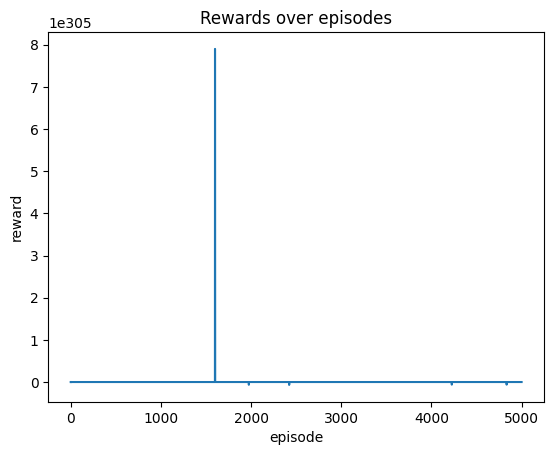

In [8]:
agent.plot_rewards()

nan

In [ ]:
# # 2 For life or until learning is stopped
# flag = 0

# for episode in range(test_episodes):
#     # Reset the environment
#     state = env.reset()
#     step = 0
#     done = False
    
#     for step in range(max_steps):
#         print("episode:{}, step:{}".format(episode, step))

#         # 3. Choose an action a in the current world state (s)
#         ## First we randomize a number
#         exp_exp_tradeoff = random.uniform(0,1)
        
#         ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
#         if exp_exp_tradeoff > epsilon:
#             if type(state) == tuple:
#                 action = np.argmax(qTable[state[0],:])
#             else:
#                 action = np.argmax(qTable[state,:])
        
#         # Else doing a random choice --> exploration
#         else:
#             action = env.action_space.sample()
        
#         # Take the action (a) and observe the outcome state(s') and reward (r)
#         new_state, reward, done, info, _ = env.step(action)

#         # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
#         if type(state) == tuple:
#             qTable[state[0], action] = qTable[state[0], action] + learning_rate * (reward + gamma * 
#                                     np.max(qTable[new_state, :]) - qTable[state[0], action])
#             flag = 1
#         else:
#             qTable[state, action] = qTable[state, action] + learning_rate * (reward + gamma * 
#                                     np.max(qTable[new_state, :]) - qTable[state, action])
                
#         # Our new state is state
#         state = new_state
        
#         # If done : finish episode
#         if done == True: 
#             flag = 0
#             break
        
    
#     # Reduce epsilon (because we need less and less exploration)
#     epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
# print("Learning done!")
    
    

In [ ]:
# df = pd.DataFrame(qTable)
# df

In [ ]:
# env.reset()
# rewards = []
# flag2 = 0

# for episode in range(test_episodes):
#     print("episode: {}".format(episode))
#     state = env.reset()
#     step = 0
#     done = False
#     total_rewards = 0
#     #print("****************************************************")
#     #print("EPISODE ", episode)

#     for step in range(max_steps):
#         print("episode: {}".format(episode))
#         # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
#         # env.render()
#         # Take the action (index) that have the maximum expected future reward given that state
# #         print("state: {}".format(state))
# #         print("episode:{}  , step:{}".format(episode, step))
#         if type(state) == tuple:
#             action = np.argmax(qTable[state[0],:])
#             flag2 = 1
#         else:
#             action = np.argmax(qTable[state,:])
        
#         new_state, reward, done, info, _ = env.step(action)
        
#         total_rewards += reward
        
#         if done:
#             rewards.append(total_rewards)
#             #print ("Score", total_rewards)
#             break
#         state = new_state
#     flag2 = 0
# env.close()
# print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

In [ ]:
# print ("Score over time: {}".format(total_rewards/test_episodes))

# print("Total rewards: {}".format(total_rewards))
